<a href="https://colab.research.google.com/github/kaispace30098/Auto-ARIMA-on-Sales/blob/main/ARIMA_for_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import r2_score
!pip install -U statsmodels
!pip install pmdarima
#Import Libraries and Sales data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
!pip install xlrd==2.0.1
!pip install -U statsmodels
from google.colab import files
uploaded = files.upload()
import io
def read_dir_file(case_f):  # case_f = 0 for uploading one File and case_f = 1 for uploading one Zipped Directory
        #uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
        for fn in uploaded.keys():
            name = fn  #.encode('utf-8')
            #print('\nfile after encode', name)
            #name = io.BytesIO(uploaded[name])
        if case_f == 0:    # case of uploading 'One File only'
            print('\n file name: ', name)
            return name
        else:   # case of uploading a directory and its subdirectories and files
            zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
            zfile.extractall()
            for d in zfile.namelist():   # d = directory
                print('\n main directory name: ', d)
                return d
fileName = read_dir_file(0)
df = pd.read_csv(io.BytesIO(uploaded[fileName ]),header=None)[1:]# Dataset is now stored in a Pandas Dataframe


     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 4.5 MB/s 
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


Saving 26month.csv to 26month.csv

 file name:  26month.csv


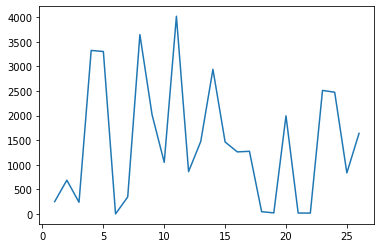

In [2]:
#Configuration on header name and data type
df = df.rename(columns={0: 'date', 1: 'Sales'})
df.Sales.apply(pd.to_numeric)
df["Sales"] = pd.to_numeric(df["Sales"], downcast="float")
#View the data
df.Sales.plot()

In [3]:
Ntest = 2
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [4]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [5]:
import pmdarima as pm

In [6]:
# Best non-seasonal model
model = pm.auto_arima(train['Sales'],
                      trace=True,
                      max_p=12, max_q=3, max_order=15,
                      suppress_warnings=True,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=433.597, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=426.387, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=418.465, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=428.009, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=420.234, Time=0.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=417.904, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=419.446, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.25 

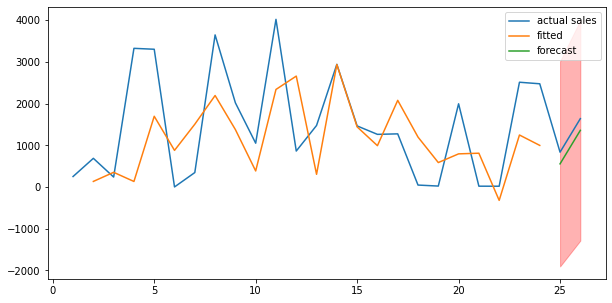

In [8]:
train_pred = model.predict_in_sample(start=1, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Sales'], label='actual sales')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')

ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
model = ARIMA(df.Sales, order=(3, 0,0))  
fitted = model.fit()
fitted.forecast(5, alpha=0.05)  # 95% conf

27    2068.794094
28    1243.918218
29    1294.886420
30    1732.334816
31    1463.209613
Name: predicted_mean, dtype: float64

In [15]:
r2_score(test['Sales'].tolist(), test_pred.tolist())


0.5131442021199519